# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
data = pd.read_csv('clustered_data.csv')
data

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression_Status
0,1.0,0.365854,1.000000,0.846154,1.0,0.0,0.897,0.4,0.0,0.00,0.000000,0.111111,1.0,0.250000,0.00,0.0,1
1,0.0,0.146341,0.058824,0.846154,0.4,0.0,0.590,1.0,0.0,0.00,0.333333,0.370370,0.0,0.250000,0.25,1.0,0
2,1.0,0.317073,0.862745,0.846154,0.6,0.0,0.703,1.0,0.0,0.50,0.000000,0.185185,0.0,0.750000,0.00,1.0,0
3,0.0,0.243902,0.960784,0.846154,0.6,0.0,0.559,0.4,0.0,0.25,0.333333,0.259259,1.0,0.333333,1.00,1.0,1
4,0.0,0.170732,0.313725,0.846154,0.8,0.0,0.813,0.6,0.0,0.00,0.333333,0.629630,1.0,0.083333,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0.0,0.219512,0.882353,0.846154,1.0,0.0,0.575,1.0,0.0,0.00,1.000000,0.407407,1.0,0.583333,0.00,1.0,1
27897,1.0,0.219512,0.490196,0.846154,0.4,0.0,0.940,0.6,0.0,0.50,0.000000,0.925926,0.0,0.000000,0.50,1.0,0
27898,1.0,0.317073,0.176471,0.846154,0.6,0.0,0.661,0.8,0.0,0.00,1.000000,0.814815,0.0,1.000000,0.25,0.0,0
27899,0.0,0.000000,0.490196,0.846154,1.0,0.0,0.688,0.4,0.0,0.50,0.000000,0.407407,1.0,0.833333,1.00,0.0,1


Mari kita lihat kembali correlation matrix dataset.

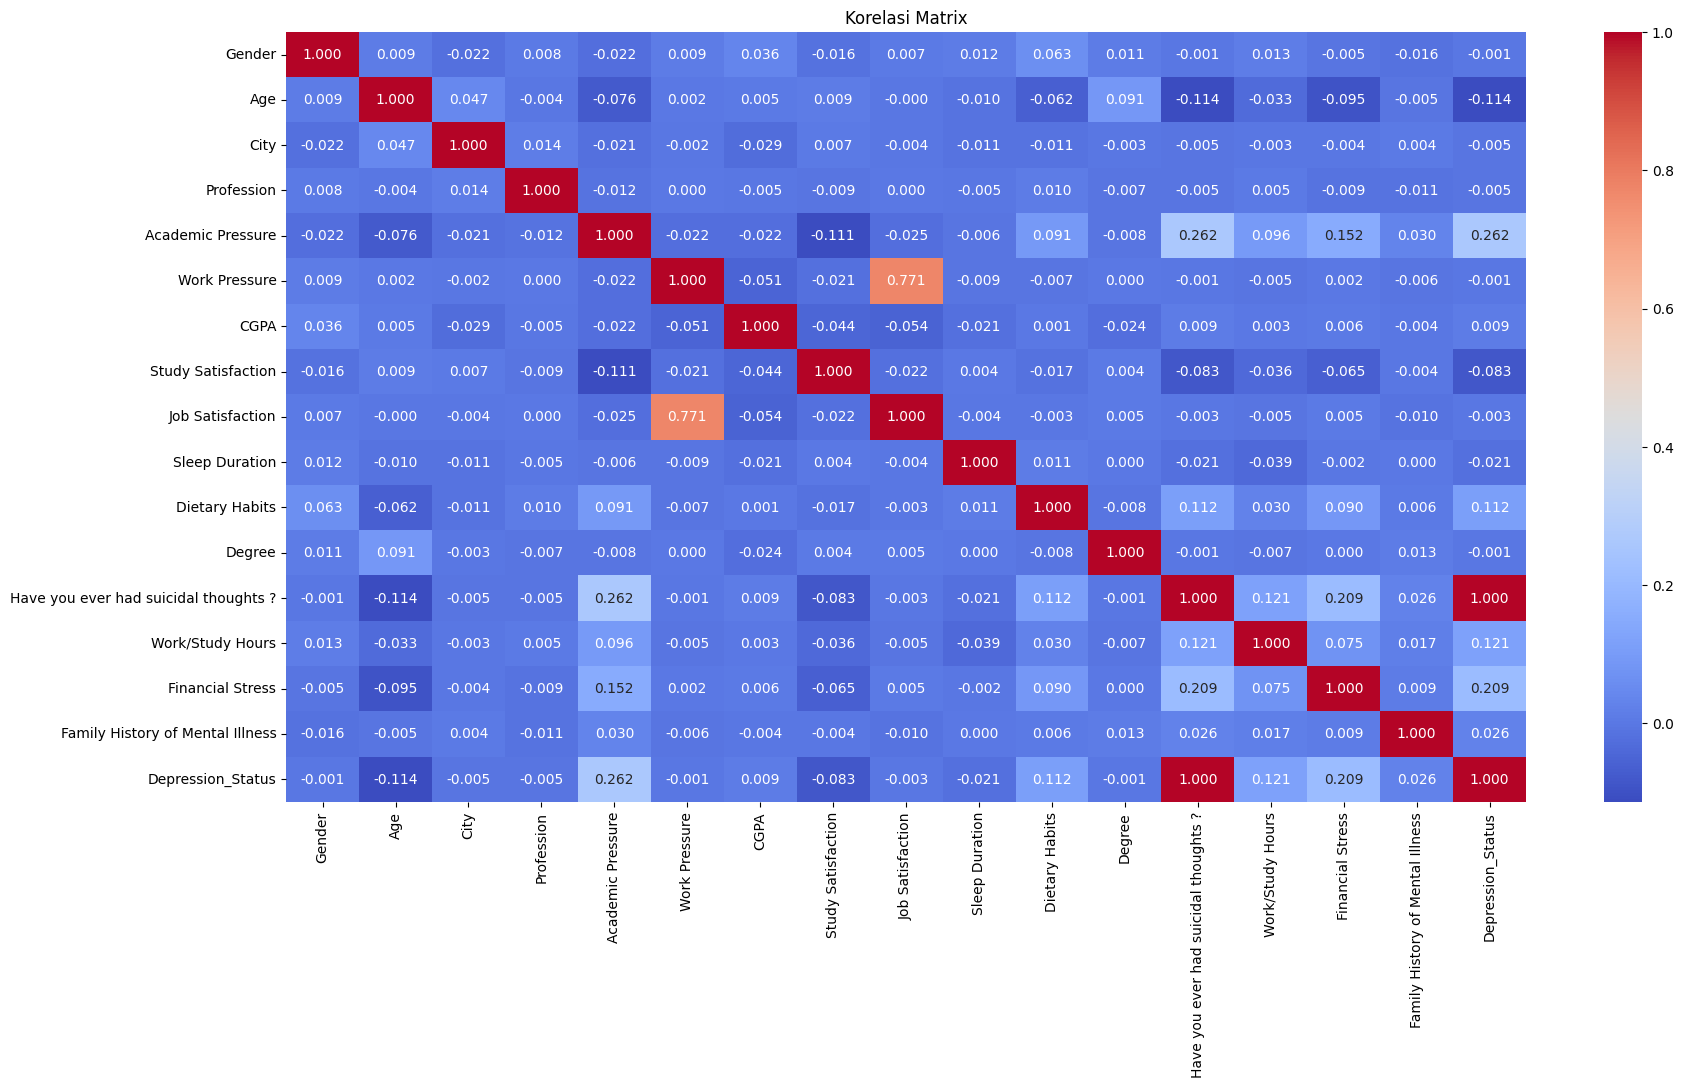

In [3]:
correlation_matrix = data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', cbar=True)
plt.title('Korelasi Matrix')
plt.show()

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

Pisah fitur dan label, dan di split training 80% dan testing 20%.

In [4]:
X = data.drop(columns=['Depression_Status'])
y = data['Depression_Status']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

Print hasil X, y, X_train, X_test, y_train, y_test untuk melihat apakah terjadi pembagian dengan benar dari data asli dan data yang telah dibagi / dipisah.

In [5]:
X

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,1.0,0.365854,1.000000,0.846154,1.0,0.0,0.897,0.4,0.0,0.00,0.000000,0.111111,1.0,0.250000,0.00,0.0
1,0.0,0.146341,0.058824,0.846154,0.4,0.0,0.590,1.0,0.0,0.00,0.333333,0.370370,0.0,0.250000,0.25,1.0
2,1.0,0.317073,0.862745,0.846154,0.6,0.0,0.703,1.0,0.0,0.50,0.000000,0.185185,0.0,0.750000,0.00,1.0
3,0.0,0.243902,0.960784,0.846154,0.6,0.0,0.559,0.4,0.0,0.25,0.333333,0.259259,1.0,0.333333,1.00,1.0
4,0.0,0.170732,0.313725,0.846154,0.8,0.0,0.813,0.6,0.0,0.00,0.333333,0.629630,1.0,0.083333,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0.0,0.219512,0.882353,0.846154,1.0,0.0,0.575,1.0,0.0,0.00,1.000000,0.407407,1.0,0.583333,0.00,1.0
27897,1.0,0.219512,0.490196,0.846154,0.4,0.0,0.940,0.6,0.0,0.50,0.000000,0.925926,0.0,0.000000,0.50,1.0
27898,1.0,0.317073,0.176471,0.846154,0.6,0.0,0.661,0.8,0.0,0.00,1.000000,0.814815,0.0,1.000000,0.25,0.0
27899,0.0,0.000000,0.490196,0.846154,1.0,0.0,0.688,0.4,0.0,0.50,0.000000,0.407407,1.0,0.833333,1.00,0.0


In [6]:
y

,Depression_Status
0,1
1,0
2,0
3,1
4,1
...,...
27896,1
27897,0
27898,0
27899,1


In [7]:
X_train

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
2859,0.0,0.268293,0.784314,0.846154,1.0,0.0,0.577,0.4,0.0,0.25,1.0,0.740741,1.0,1.000000,1.00,0.0
24289,1.0,0.048780,0.901961,0.846154,1.0,0.0,0.891,1.0,0.0,0.75,0.0,0.407407,1.0,0.916667,0.75,0.0
23465,0.0,0.317073,0.156863,0.846154,0.8,0.0,0.561,0.6,0.0,0.25,1.0,0.444444,0.0,0.083333,0.50,0.0
6469,0.0,0.365854,0.156863,0.846154,0.6,0.0,0.859,0.2,0.0,0.75,0.0,1.000000,1.0,0.666667,0.00,0.0
6961,1.0,0.146341,0.274510,0.846154,0.8,0.0,0.777,0.8,0.0,0.50,0.0,0.185185,1.0,0.666667,0.25,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27430,1.0,0.097561,0.764706,0.846154,0.2,0.0,0.939,0.4,0.0,0.75,1.0,0.259259,1.0,1.000000,0.75,0.0
23190,0.0,0.219512,0.568627,0.846154,1.0,0.0,0.972,0.8,0.0,0.50,1.0,0.222222,0.0,0.500000,0.75,0.0
10685,0.0,0.146341,0.176471,0.846154,0.6,0.0,0.599,0.2,0.0,0.00,0.0,0.407407,1.0,0.750000,1.00,0.0
14916,1.0,0.121951,0.274510,0.846154,0.6,0.0,0.941,0.2,0.0,0.75,0.0,0.666667,1.0,0.083333,0.75,1.0


In [8]:
X_test

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
3257,0.0,0.170732,0.176471,0.846154,0.6,0.0,0.636,0.6,0.0,0.75,0.000000,0.629630,0.0,0.750000,0.75,0.0
15561,1.0,0.146341,0.901961,0.846154,0.4,0.0,0.921,0.6,0.0,0.25,0.333333,0.037037,1.0,0.583333,0.25,0.0
10326,0.0,0.146341,0.490196,0.846154,1.0,0.0,0.891,0.6,0.0,0.25,0.000000,0.000000,1.0,0.500000,1.00,0.0
10103,0.0,0.219512,0.784314,0.846154,0.6,0.0,0.516,0.8,0.0,0.00,0.333333,0.000000,0.0,0.833333,0.00,0.0
440,0.0,0.146341,0.117647,0.846154,0.4,0.0,0.516,0.2,0.0,0.00,0.333333,0.629630,1.0,0.166667,0.75,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.0,0.365854,0.176471,0.846154,1.0,0.0,0.808,0.8,0.0,0.75,0.333333,0.407407,0.0,0.750000,0.00,1.0
9399,1.0,0.390244,0.960784,0.846154,1.0,0.0,0.808,0.4,0.0,0.75,1.000000,0.111111,0.0,0.916667,0.00,0.0
7249,1.0,0.243902,0.745098,0.846154,0.4,0.0,0.984,1.0,0.0,0.75,0.333333,0.000000,1.0,1.000000,0.50,1.0
8949,0.0,0.024390,0.274510,0.846154,1.0,0.0,0.737,0.2,0.0,0.00,1.000000,0.407407,1.0,0.583333,0.25,1.0


In [9]:
y_train

,Depression_Status
2859,1
24289,1
23465,0
6469,1
6961,1
...,...
27430,1
23190,0
10685,1
14916,1


In [10]:
y_test

,Depression_Status
3257,0
15561,1
10326,1
10103,0
440,1
...,...
181,0
9399,0
7249,1
8949,1


Melihat distribusi pembagian label.

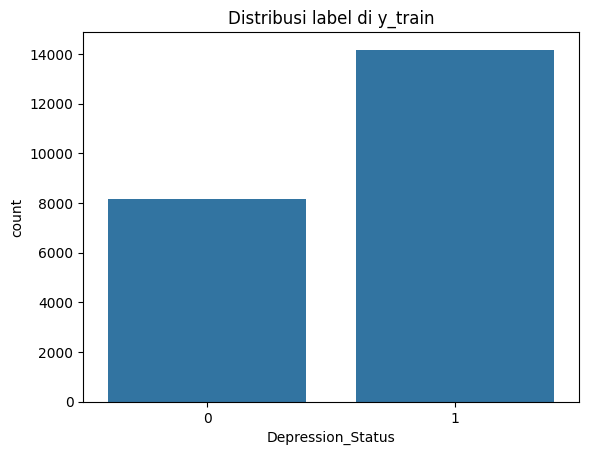

In [11]:
sns.countplot(x=y_train)
plt.title("Distribusi label di y_train")
plt.show()

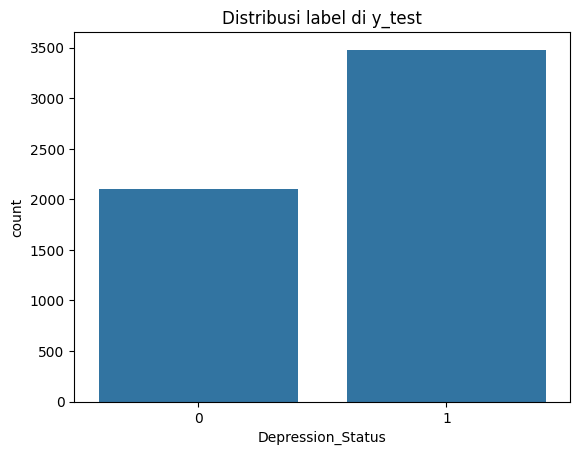

In [12]:
sns.countplot(x=y_test)
plt.title("Distribusi label di y_test")
plt.show()

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

Model 1. Support Vector Classification

Support Vector Classification adalah model klasifikasi machine learning yang umum digunakan untuk melakukan klasifikasi biner.

Alasan saya memakai model ini juga karena Support Vector Classification umumnya digunakan untuk mengklasifikasikan dataset dengan label biner tanpa perlu menggunakan kernel trick.

SVC akan mencari garis pemisah / hyperplane, untuk memisahkan label 0 dan label 1 yang optimal dengan margin tertinggi antar support vector label 0 dan support vector label 1.

In [13]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC()

Model 2. Random Forest Classification

Untuk Random Forest Classification, model ini adalah ensemble model, yang berarti model ini adalah gabungan dari beberapa model.

Random Forest Classification adalah kumpulan dari beberapa Decision Tree yang bisa ditentukan dari n_estimators.

Random Forest Classification biasanya akan menghasilkan hasil metrik yang baik karena prediksi datang dari banyak model dan menggunakan sistem voting terbanyak untuk menentukan hasilnya.

Random Forest Classification juga berisikan decision tree dengan pemilihan fitur yang berbeda-beda.

Model ini baik untuk handle dataset yang besar, dan sulit untuk overfit karena dia merata-ratakan hasil dari decision tree yang banyak.

In [14]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=None)
rfc.fit(X_train, y_train)

RandomForestClassifier()

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Melakukan prediksi untuk SVC, train dan test.

In [15]:
svc_ypred_train = svc.predict(X_train)
svc_ypred_test = svc.predict(X_test)

Evaluasi metric SVC dengan akurasi, precision, recall, f1-score

Yang training :

In [16]:
svc_acc_train = accuracy_score(y_train, svc_ypred_train)
svc_rec_train = recall_score(y_train, svc_ypred_train)
svc_prec_train = precision_score(y_train, svc_ypred_train)
svc_f1_train = f1_score(y_train, svc_ypred_train)

print("SVC Accuracy - Train :", svc_acc_train)
print("SVC Recall - Train :", svc_rec_train)
print("SVC Precision - Train :", svc_prec_train)
print("SVC F1-Score - Train :", svc_f1_train)

SVC Accuracy - Train : 1.0
SVC Recall - Train : 1.0
SVC Precision - Train : 1.0
SVC F1-Score - Train : 1.0


Yang testing :

In [17]:
svc_acc_test = accuracy_score(y_test, svc_ypred_test)
svc_rec_test = recall_score(y_test, svc_ypred_test)
svc_prec_test = precision_score(y_test, svc_ypred_test)
svc_f1_test = f1_score(y_test, svc_ypred_test)

print("SVC Accuracy - Test :", svc_acc_test)
print("SVC Recall - Test :", svc_rec_test)
print("SVC Precision - Test :", svc_prec_test)
print("SVC F1-Score - Test :", svc_f1_test)

SVC Accuracy - Test : 1.0
SVC Recall - Test : 1.0
SVC Precision - Test : 1.0
SVC F1-Score - Test : 1.0


Confusion matrix untuk SVC

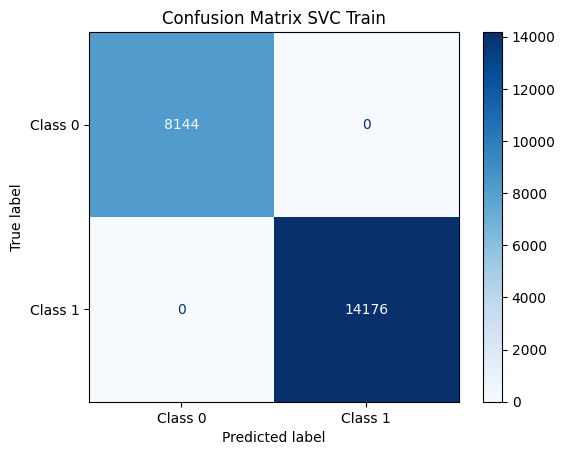

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_train, svc_ypred_train)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Class 0", "Class 1"])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix SVC Train')
plt.show()


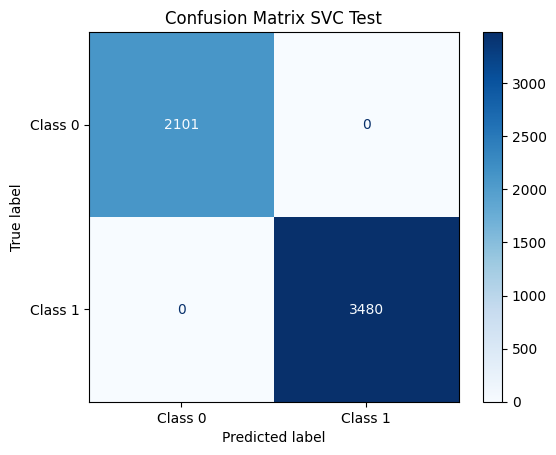

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, svc_ypred_test)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Class 0", "Class 1"])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix SVC Test')
plt.show()


Evaluasi metric Random Forest Classifier dengan akurasi, recall, precision, f1-score.

In [20]:
rfc_ypred_train = rfc.predict(X_train)
rfc_ypred_test = rfc.predict(X_test)

Yang training :

In [21]:
rfc_acc_train = accuracy_score(y_train, rfc_ypred_train)
rfc_rec_train = recall_score(y_train, rfc_ypred_train)
rfc_prec_train = precision_score(y_train, rfc_ypred_train)
rfc_f1_train = f1_score(y_train, rfc_ypred_train)

print("RFC Accuracy - Train :", rfc_acc_train)
print("RFC Recall - Train :", rfc_rec_train)
print("RFC Precision - Train :", rfc_prec_train)
print("RFC F1-Score - Train :", rfc_f1_train)

RFC Accuracy - Train : 1.0
RFC Recall - Train : 1.0
RFC Precision - Train : 1.0
RFC F1-Score - Train : 1.0


Yang testing :

In [22]:
rfc_acc_test = accuracy_score(y_test, rfc_ypred_test)
rfc_rec_test = recall_score(y_test, rfc_ypred_test)
rfc_prec_test = precision_score(y_test, rfc_ypred_test)
rfc_f1_test = f1_score(y_test, rfc_ypred_test)

print("RFC Accuracy - Test :", rfc_acc_test)
print("RFC Recall - Test :", rfc_rec_test)
print("RFC Precision - Test :", rfc_prec_test)
print("RFC F1-Score - Test :", rfc_f1_test)

RFC Accuracy - Test : 1.0
RFC Recall - Test : 1.0
RFC Precision - Test : 1.0
RFC F1-Score - Test : 1.0


Confusion matrix untuk Random Forest Classifier

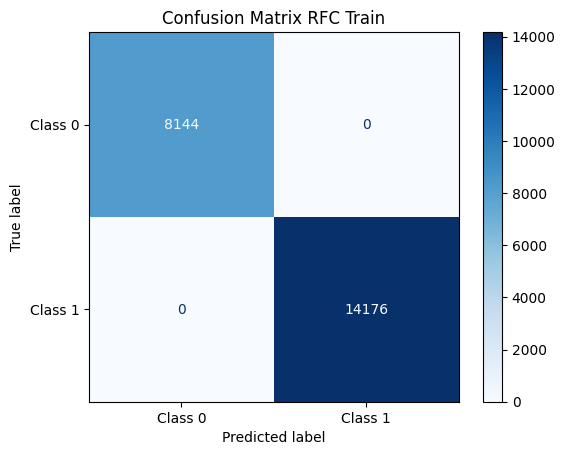

In [23]:
conf_matrix = confusion_matrix(y_train, rfc_ypred_train)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Class 0", "Class 1"])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix RFC Train')
plt.show()

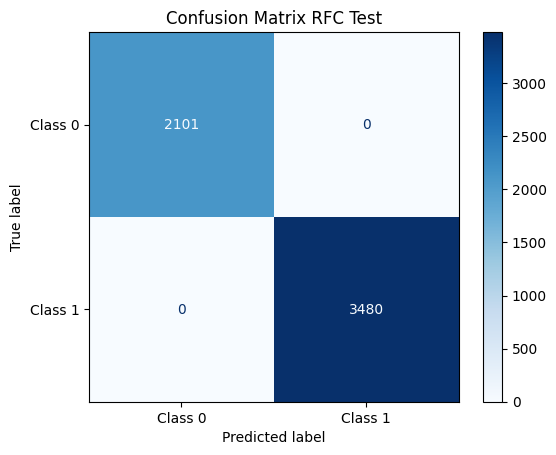

In [24]:
conf_matrix = confusion_matrix(y_test, rfc_ypred_test)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Class 0", "Class 1"])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix RFC Test')
plt.show()

Hasil dari kedua model sama, semua data testing diprediksi dengan benar.

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [25]:
# tidak dilakukan karena overfit

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [26]:
# tidak dilakukan karena overfit

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Data yang digunakan dalam Klasifikasi ini adalah hasil clustering dari notebook clustering.

Dalam notebook clustering, silhouette score dari cluster adalah 0.724, dimana hal tersebut menandakan data terbagi dengan cukup baik dengan 72.4%

Namun, jika kita lihat, perbedaan data tidak terlalu jauh dalam kebanyakan fitur --> low variance.

Ketika data tersebut digunakan dalam klasifikasi, karena cluster 0 dan cluster 1 cukup mirip, model tidak memperlihatkan kelemahannya dalam notebook ini, dan karena itu model mengalami *overfitting* yang ditandakan dengan hasil akurasi, recall, precision, f1-score dengan value 1.0

Rekomendasi tindakan lanjutan, misalkan jika ada yang ingin melanjutkan, adalah untuk mengumpulkan data tambahan yang bisa memperbesar perbedaan dari fitur-fitur yang mirip, meskipun hasil silhouette score sudah melewati minimal 0.55, yaitu 0.724. Lalu, bisa juga dilakukan oversampling / undersampling. Di luar notebook, hal tersebut sudah dilakukan namun belum menunjukkan perubahan, tetap overfitting.

Demikian dari saya, terima kasih.